## Continuous RQA

Continuous RQA (contRQA) is used to examine the dynamics of continuous behaviour sequences, such as physiological signals (e.g., heart rate or EEG data) or tracking data from a motion capture system. Recurrence analysis allows us to visualise the dynamics of such behaviours by plotting 'recurrent' states on a 2D recurrence plot. Here, the data points are mapped to orthogonal axes, 𝑥𝑖 = 1,2,...,𝑛 and 𝑦𝑗 = 1,2,...,𝑛, representing a 2-dimensional plot. The states 𝑥𝑖 and 𝑦𝑗 that reoccur are plotted, indicated by blue points on the recurrence plot. From the recurrence plot, we can determine the degree of recurrence, the persistence of repeating sequences, and other patterns that give us insight into the underlying dynamics of the system. RQA quantifies these properties through various metrics, including:

- Recurrence Rate (%REC): The percentage of recurrent points in the plot, which indicates how often states reoccur.
- Determinism (%DET): The percentage of recurrent points that form diagonal lines of at least a given length (e.g., 2 points), indicating patterns that repeat in the same order.
- Maxline: The length of the longest diagonal sequence of recurrent points.
- Meanline: The average length of diagonal lines in the plot, giving insight into typical repeating sequences.
- Entropy (ENT): The Shannon entropy of the distribution of diagonal line lengths, which measures the complexity of recurrent patterns.
- Laminarity (LAM): The percentage of recurrent points forming vertical lines, which can reflect how states are trapped for extended periods.

Notably, for auto-recurrence metrics, the main diagonal (i.e., the line of identity) is excluded from RQA metrics, as it simply reflects a point being recurrent with itself.

#### Parameters for Running Continuous RQA

To run RQA for continuous data, we need to select three parameters:

- Time delay: This represents the interval between samples required to unfold the temporal structure of a system's trajectory. The appropriate delay helps to reconstruct the system’s dynamics in the phase space. For continuous RQA, time delay is typically calculated using an average mutual information (AMI) analysis. To learn more about this, see [ami.ipynb](ami.ipynb) in the current tutorial.
- Embedding dimension: This is the number of dimensions needed to recover the system's phase space. For continuous RQA, embedding dimension is typically calculated using a false nearest neighbors (FNN) analysis. To learn more about this, see [fnn.ipynb](fnn.ipynb) in the current tutorial.
- Radius: This defines how close two states must be to be considered recurrent. Unlike categorical RQA, the radius for continuous data is a threshold based on a distance metric (e.g., Euclidean distance), ensuring that nearby—but not necessarily identical—states are considered recurrent.


#### Let's Practice Running RQA on Continuous Data

Before we begin, we need to import and load various packages and utilities. These will allow us to import the data, manipulate it, run the RQA analysis, and create visualizations to explore our results.

The code below will do all the setup for you. Simply click the "play" button on the left to run the code, and we'll be ready to start our analysis. 

In [8]:
import os
import pandas as pd
from utils import filter_data, interpolate_missing_data
from utils.rqa_utils import perform_rqa
from utils.plot_utils import plot_ts_and_rqa, plot_rqa_multi_radii, plot_windowed_ts_and_rqa

Now that all the utilities are loaded, it's time to apply RQA to some real data—in this case, [acceleration data from a person walking](data/rqaContinuous/walkerAfriend.txt).

Just click the "play" button below to perform the analysis and generate the visualisations.

Loading file: walkerAfriend.txt


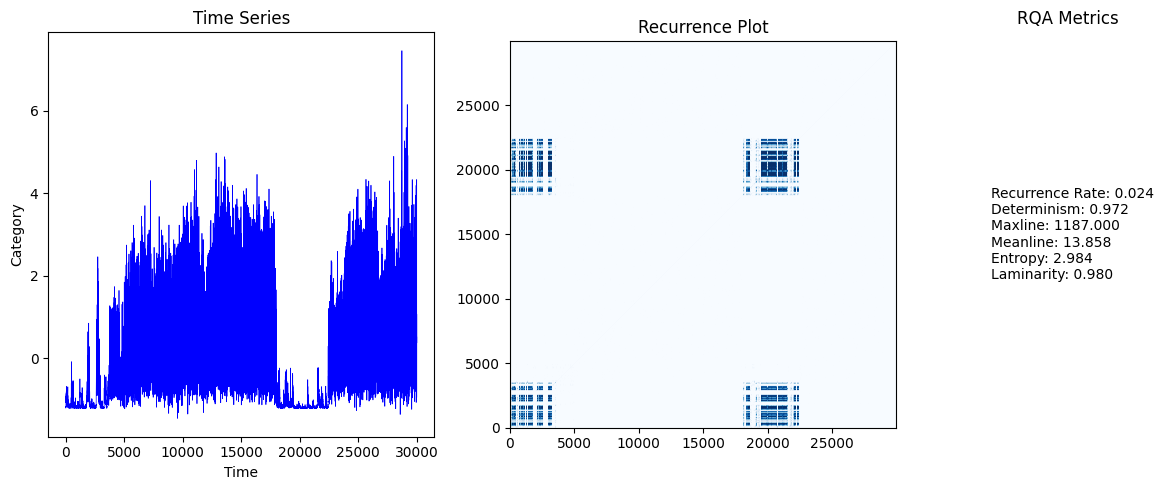

RQA analysis and plotting completed successfully!


In [9]:
# First set the directory path for the data
data_directory = "data/rqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "walkerAfriend.txt"
file_path = os.path.join(data_directory, file_name)

# RQA parameters
rqa_params = {
    'delay': 15,
    'embedding_dimension': 3,
    'radius': 0.1,
    'minLine': 2,
    'getRP': True
}

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the file into a DataFrame
    data = pd.read_csv(file_path, header=None)

    # Assume the data is a single unnamed column
    continuous_data = data.iloc[:, 0].to_frame()

    # Interpolate any missing data that might be present in the file
    continuous_data = interpolate_missing_data(continuous_data)

    # Apply a filter to the data
    continuous_data = filter_data(continuous_data)
    
    # Normalise the data by using a z-score
    continuous_data = (continuous_data - continuous_data.mean()) / continuous_data.std()

    # Perform RQA using perform_rqa function from rqa_utils
    rqa_results, rp_results = perform_rqa(continuous_data, **rqa_params)

    # Print RQA results
    # Create RQA metrics dictionary
    for column, result in rqa_results.items():
        rqa_metrics = {
            'Recurrence Rate': result.recurrence_rate,
            'Determinism': result.determinism,
            'Maxline': result.longest_diagonal_line,
            'Meanline': result.average_diagonal_line,
            'Entropy': result.entropy_diagonal_lines,
            'Laminarity': result.laminarity,
        }

    # Plot time series and recurrence plot side-by-side
    plot_ts_and_rqa(continuous_data[0].values, rp_results[0].recurrence_matrix, rqa_metrics, save_image, f'images/rqa/{file_name}_combined_plot.png')
    
    print('RQA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')

#### Interpreting the Results

If your code ran successfully, you should see the following RQA metrics for the data:

- %REC: 2.4% - This value tells us how often the system returns to a previous state, providing insight into the recurrence within the individual's walking dynamics. Higher recurrence values indicate more frequent returns to similar acceleration values.
- %DET: 97.2% - This represents the proportion of recurrence points that form diagonal lines, reflecting the predictability of the walking pattern.
- Maxline: 1187 - This metric identifies the longest sequence of recurring acceleration patterns, showing the longest period over which the individual maintained a stable acceleration pattern.
- Meanline: 13.9 - This is the average length of diagonal lines in the recurrence plot, giving us insight into the typical duration for which the walking dynamics remain consistent.

Our walker was walking with a [friend](data/rqaContinuous/walkerBfriend.txt). Let's see how the RQA metrics above compare to the friend's acceleration data. Click "play" on the code chunk below to run the RQA on both the original walker and their friend, and observe the differences.

Loading file: walkerAfriend.txt


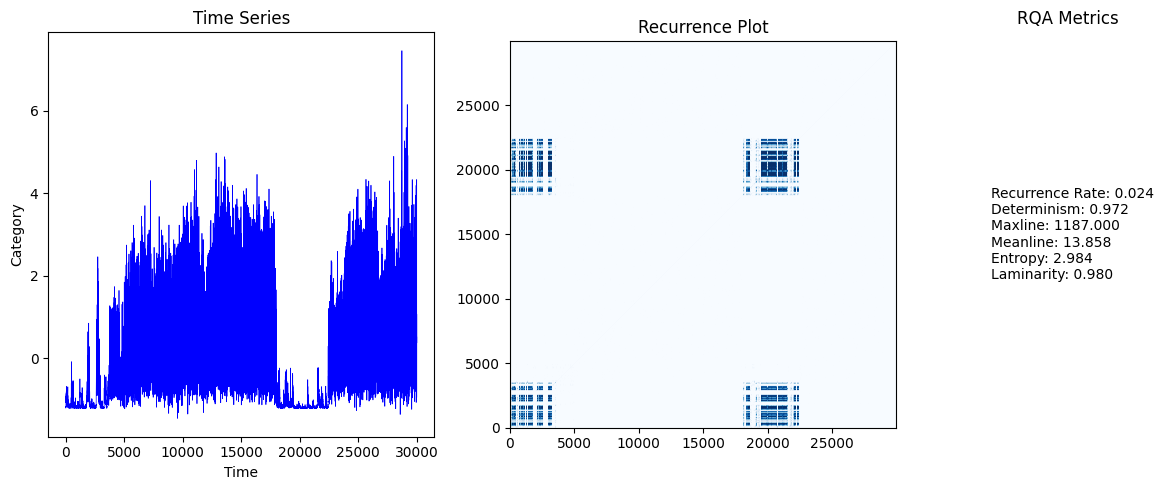

RQA analysis and plotting completed successfully!
Loading file: walkerBfriend.txt


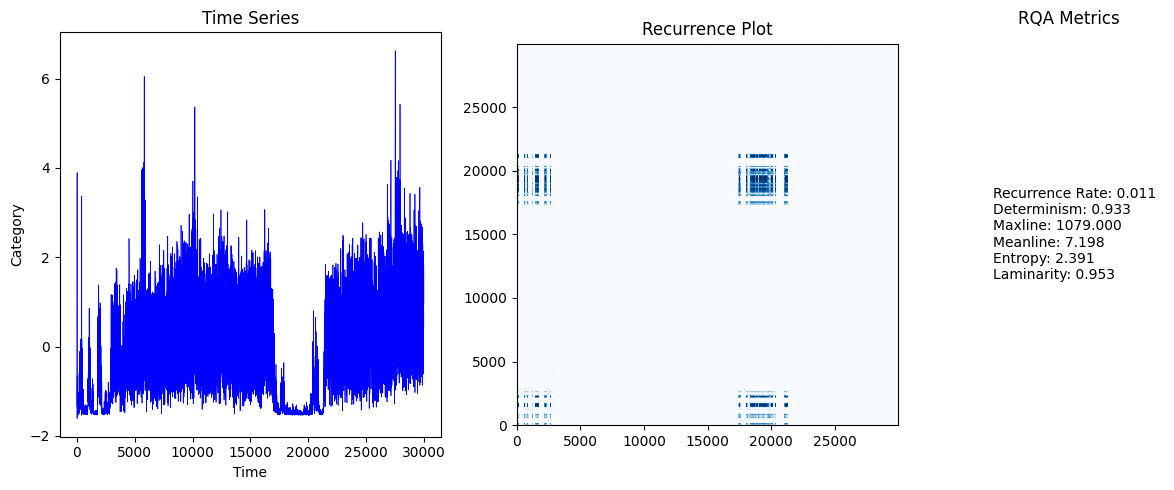

RQA analysis and plotting completed successfully!


In [10]:
# First set the directory path for the data
data_directory = "data/rqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file names for the data
file_names = ["walkerAfriend.txt", "walkerBfriend.txt"]

file_path = os.path.join(data_directory, file_name)

# Set RQA parameters
rqa_params = {
    'delay': 15,
    'embedding_dimension': 3,
    'radius': 0.1,
    'minLine': 2,
    'getRP': True
}

# Loop through each file and perform RQA
for file_name in file_names:
    file_path = os.path.join(data_directory, file_name)

    # Check if the file exists
    if os.path.exists(file_path):
        print(f'Loading file: {file_name}')

        # Load the file into a DataFrame
        data = pd.read_csv(file_path, header=None)

        # Assume the data is a single unnamed column
        continuous_data = data.iloc[:, 0].to_frame()

        # Interpolate any missing data that might be present in the file
        continuous_data = interpolate_missing_data(continuous_data)

        # Apply a filter to the data
        continuous_data = filter_data(continuous_data)
    
        # Normalise the data by using a z-score
        continuous_data = (continuous_data - continuous_data.mean()) / continuous_data.std()

        # Perform RQA using perform_rqa function from rqa_utils
        rqa_results, rp_results = perform_rqa(continuous_data, **rqa_params)

        # Print RQA results
        # Create RQA metrics dictionary
        for column, result in rqa_results.items():
            rqa_metrics = {
                'Recurrence Rate': result.recurrence_rate,
                'Determinism': result.determinism,
                'Maxline': result.longest_diagonal_line,
                'Meanline': result.average_diagonal_line,
                'Entropy': result.entropy_diagonal_lines,
                'Laminarity': result.laminarity,
            }

        # Plot time series and recurrence plot side-by-side
        plot_ts_and_rqa(continuous_data[0].values, rp_results[0].recurrence_matrix, rqa_metrics, save_image, f'images/rqa/{file_name}_combined_plot.png')
        
        print('RQA analysis and plotting completed successfully!')
    else:
        print(f'File {file_name} not found in directory {data_directory}')

#### Comparing the Results

If you examine the recurrence plots (RPs) and the resulting RQA metrics, you'll notice that the second walker shows less recurrent activity than the first. There are less blue lines in the second plot, and the RQA metrics are lower. This indicates less repetition (%REC) and less predictability (%DET) in the walking pattern for the second walker.

#### Changing the Radius

In the previous code, we used the following parameters:
- Time delay: 15
- Embedding dimension: 3
- Radius = 0.1

The time delay and the embedding dimension were selected using an average mutual information (AMI) analysis, and a false nearest neighbors (FNN) analysis. See the relevant analysis scripts, [ami.ipynb](ami.ipynb) and [fnn.ipynb](fnn.ipynb), for more information on selecting these.

Recall that the radius determines how close two states must be in phase space to be considered recurrent. Adjusting the radius therefore allows us to control the sensitivity of detecting recurrences. 

Let’s run RQA on the first walker again, this time using a range of radii: 0.1, 0.2, and 0.5. Observe how changing the radius influences the recurrence plot and the resulting metrics, such as %REC and %DET.

Click "play" to execute the code below and examine how the results differ for each radius.

Loading file: walkerAfriend.txt
Running RQA with radius: 0.1
Running RQA with radius: 0.2
Running RQA with radius: 0.5


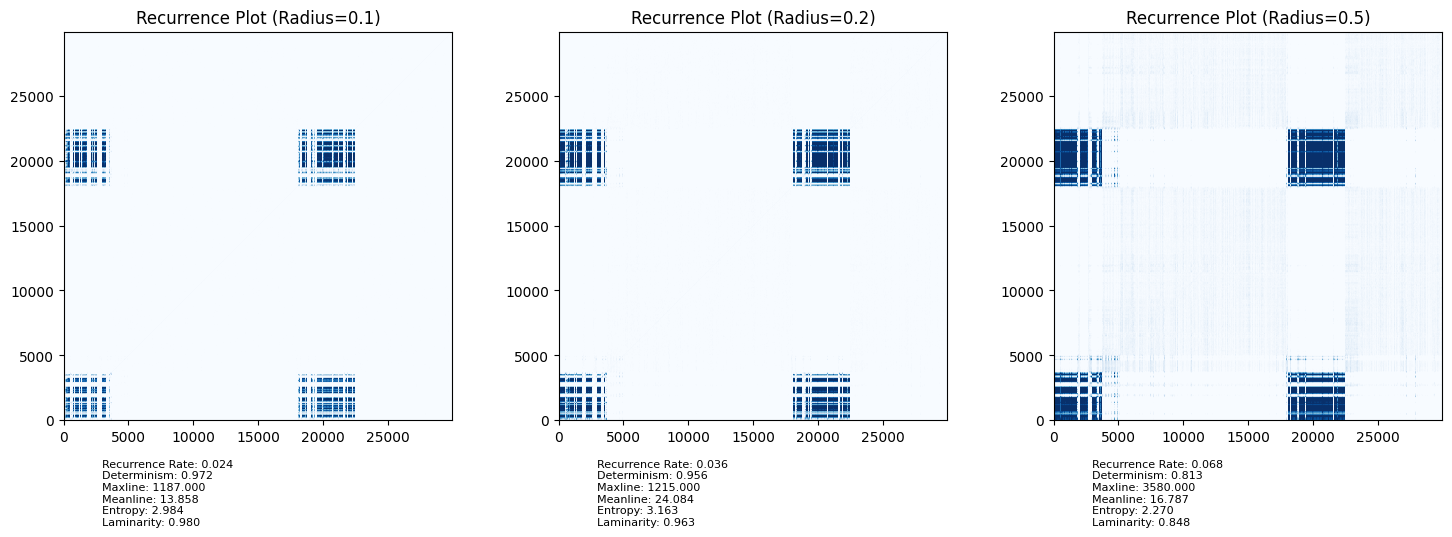

RQA analysis and plotting completed successfully!


In [11]:
# First set the directory path for the data
data_directory = "data/rqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "walkerAfriend.txt"
file_path = os.path.join(data_directory, file_name)

# Set RQA parameters
rqa_params = {
    'delay': 15,
    'embedding_dimension': 3,
    'minLine': 2,
    'getRP': True
}

# Define radii to test
radii = [0.1, 0.2, 0.5]

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None)

    # Assume the data is a single unnamed column
    continuous_data = data.iloc[:, 0].to_frame()

    # Interpolate any missing data that might be present in the file
    continuous_data = interpolate_missing_data(continuous_data)

    # Apply a filter to the data
    continuous_data = filter_data(continuous_data)
    
    # Normalise the data by using a z-score
    continuous_data = (continuous_data - continuous_data.mean()) / continuous_data.std()

    # Loop through each radius value and perform RQA
    rp_results_list = []
    rqa_metrics_list = []
    for radius in radii:
        print(f'Running RQA with radius: {radius}')
        rqa_params['radius'] = radius

        # Perform RQA using perform_rqa function from rqa_utils
        rqa_results, rp_results = perform_rqa(continuous_data, **rqa_params)

        # Create RQA metrics dictionary
        for column, result in rqa_results.items():
            rqa_metrics = {
                'Recurrence Rate': result.recurrence_rate,
                'Determinism': result.determinism,
                'Maxline': result.longest_diagonal_line,
                'Meanline': result.average_diagonal_line,
                'Entropy': result.entropy_diagonal_lines,
                'Laminarity': result.laminarity,
            }
            rqa_metrics_list.append(rqa_metrics)
            rp_results_list.append(rp_results[0].recurrence_matrix)

    # Plot recurrence plots and metrics for different radii
    plot_rqa_multi_radii(rp_results_list, rqa_metrics_list, radii, save_image, f'images/rqa/{file_name}_multi_radii_plot.png')
    
    print('RQA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')

#### Selecting the Optimal Radius

When selecting a radius, best practice involves using a range of values and choosing the one that yields a reasonable set of %REC values for biological systems (typically between 0.5% and 5%). In this case, the best radius for our walking data appears to be 0.1, which yields a %REC value of 2.4%. 

In real datasets, it is important to evaluate whether the distribution of RQA metrics changes significantly across different settings. Although the absolute values of the RQA metrics may vary (e.g., %REC will increase as the radius increases), the overall distribution across the dataset should remain generally consistent. This consistency can give you confidence that your parameters are appropriate.

#### Going Further

To expand your understanding of continuous RQA, you can try the following:

1. Analyse other time series: Repeat the analyses above with other types of continuous data such as a [sine wave](data/rqaContinuous/sin.txt) or [white noise](data/rqaContinuous/white.txt). 
2. Experiment with other parameters: Previously, we experimented with different radii values. Now, try adjusting the time delay or embedding dimension to see how these parameters impact the recurrence plots and RQA metrics.
3. Learn how to select an appropriate delay and embedding dimension: Head over to [ami.ipynb](ami.ipynb) or [fnn.ipynb](fnn.ipynb) within this tutorial to learn more about setting the hyperparameters required for continuous RQA.
4. Run a windowed RQA: To assess how recurrence patterns change over time, explore [rqaWindowed.ipynb](rqaWindowed.ipynb) which walks you through performing windowed RQA.